[Ternary Uniform Generator](ternaryuniformgenerator.h)

In [27]:
import numpy as np

In [38]:
# ------------------------------
# Ternary sampler
# ------------------------------
def sample_ternary(n: int,
                   p_minus: float = 0.25,
                   p_zero: float = 0.50,
                   p_plus: float = 0.25,
                   rng: np.random.Generator | None = None) -> np.ndarray:
    """
    Ternary sampling for coefficients in {-1, 0, +1} with given probabilities.
    Probabilities must sum to 1. Vectorized.
    """
    if rng is None:
        rng = np.random.default_rng()
    if abs((p_minus + p_zero + p_plus) - 1.0) > 1e-12:
        raise ValueError("Probabilities must sum to 1.")
    edges = np.array([p_minus, p_minus + p_zero], dtype=np.float64)
    print(edges)
    u = rng.random(n)
    print(u)
    out = np.empty(n, dtype=np.int8)
    out[:] = 1
    out[u < edges[0]] = -1
    out[(u >= edges[0]) & (u < edges[1])] = 0
    return out.astype(np.int8)

In [4]:
qp = np.array([281474976317441, 140737518764033, 140737470791681, 140737513783297,
        140737471578113, 140737513259009, 140737471971329, 140737509851137,
        140737480359937, 140737509457921, 140737481801729, 140737508671489,
        140737482981377, 140737506705409, 140737483898881, 140737504608257,
        140737484685313, 140737499496449, 140737485864961, 140737493729281,
        140737486520321, 140737490976769, 140737487306753, 140737488486401,
        281474975662081, 281474974482433, 281474966880257, 281474962554881,
        281474960326657, 281474957180929, 281474955476993, 281474952462337],
       dtype=object)

In [39]:
# ------------------------------
# Simple Test
# ------------------------------
if __name__ == "__main__":
    # Test 1: Basic functionality
    samples = sample_ternary(10, rng=np.random.default_rng(42))
    print("Sample output (10 values):", samples)
    assert set(np.unique(samples)).issubset({-1, 0, 1}), "Invalid values!"
    
    # Test 2: Probability check (large N)
    N = 1 << 16
    s = sample_ternary(N, p_minus=0.2, p_zero=0.6, p_plus=0.2, rng=np.random.default_rng(1))
    vals, counts = np.unique(s, return_counts=True)
    probs = dict(zip(vals, counts / N))
    print("\nEmpirical probabilities:")
    print(f"-1: {probs.get(-1, 0):.3f} (expected 0.2)")
    print(f" 0: {probs.get(0, 0):.3f} (expected 0.6)")
    print(f"+1: {probs.get(1, 0):.3f} (expected 0.2)")
    
    # Test 3: Error on invalid probabilities
    try:
        sample_ternary(5, p_minus=0.3, p_zero=0.3, p_plus=0.3)
        assert False, "Should have raised ValueError!"
    except ValueError as e:
        print("\n✅ Correctly rejected invalid probabilities:", e)

    print("\n🎉 All tests passed!")

[0.25 0.75]
[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]
Sample output (10 values): [ 1  0  1  0 -1  1  1  1 -1  0]
[0.2 0.8]
[0.51182162 0.9504637  0.14415961 ... 0.14980167 0.05710966 0.98193181]

Empirical probabilities:
-1: 0.199 (expected 0.2)
 0: 0.600 (expected 0.6)
+1: 0.201 (expected 0.2)

✅ Correctly rejected invalid probabilities: Probabilities must sum to 1.

🎉 All tests passed!


In [44]:
rng = np.random.default_rng()

In [45]:
rng.random(1<<16)

array([0.48664235, 0.04018485, 0.21826032, ..., 0.92757246, 0.25945762,
       0.10021283], shape=(65536,))

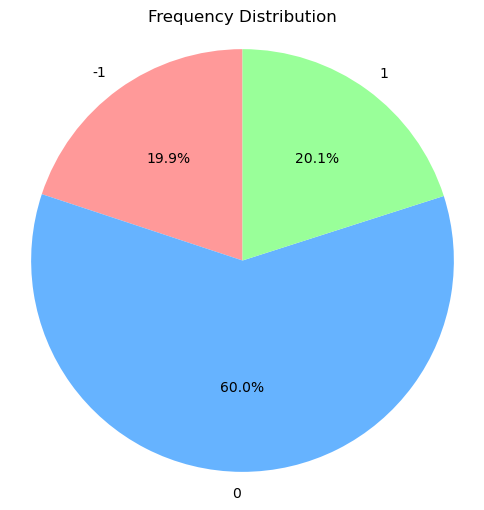

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Example: your NumPy ndarray (replace this with your actual array)
arr = s

# 1. Count frequencies of unique values
unique_vals, counts = np.unique(arr, return_counts=True)

# 2. Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=unique_vals,
    autopct='%1.1f%%',      # Show percentages
    startangle=90,          # Rotate start angle
    colors=['#ff9999', '#66b3ff', '#99ff99']  # Optional: custom colors
)

plt.title("Frequency Distribution")
plt.axis('equal')  # Ensure pie is circular
plt.show()

check output from openFHE

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
start_line = 7   # first line to read (1-based index)
end_line = 7+65535     # last line to read
with open("test.txt", "r") as file:
    lines = file.readlines()

selected_lines = lines[start_line - 1:end_line]

# for line in selected_lines:
#     print(line.strip())  # remove newline characters

Counter(selected_lines)

Counter({'0\n': 21917, '-1\n': 21841, '1\n': 21778})

In [23]:
# freq = Counter(selected_lines)

# # Ensure order (-1, 0, 1)
# values = ['-1\n', '0\n', '1\n']
# counts = [freq[v] for v in values]

# # Plot bar chart
# plt.bar(values, counts, color='skyblue', edgecolor='black')

# plt.title("Frequency of Values (-1, 0, 1)")
# plt.xlabel("Value")
# plt.ylabel("Count")

# # Optional: add value labels above bars
# for i, count in enumerate(counts):
#     plt.text(values[i], count + 0.5, str(count), ha='center')

# plt.show()

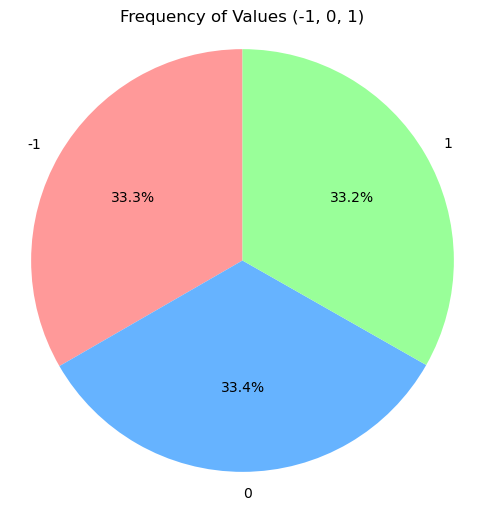

In [22]:
labels = ['-1', '0', '1']  # Clean labels for the pie chart

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

plt.title("Frequency of Values (-1, 0, 1)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

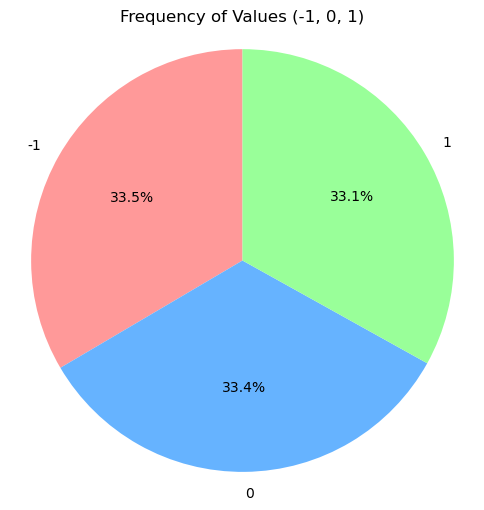

In [24]:
start_line = 65552   # first line to read (1-based index)
end_line = 65552+65535     # last line to read
with open("test.txt", "r") as file:
    lines = file.readlines()

selected_lines2 = lines[start_line - 1:end_line]

freq = Counter(selected_lines2)

# Ensure order (-1, 0, 1)
values = ['-1\n', '0\n', '1\n']
counts = [freq[v] for v in values]

labels = ['-1', '0', '1']  # Clean labels for the pie chart

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

plt.title("Frequency of Values (-1, 0, 1)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

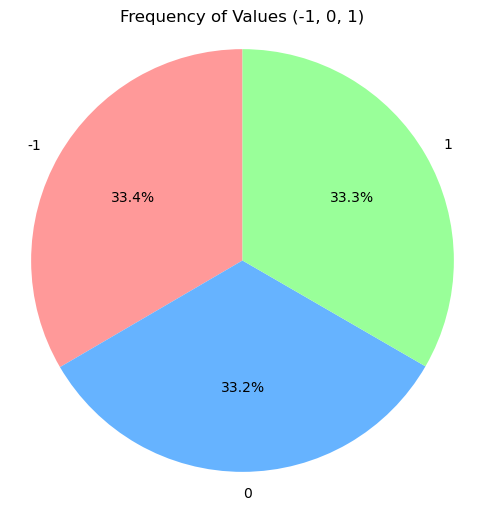

In [25]:
start_line = 131091   # first line to read (1-based index)
end_line = 131091+65535     # last line to read
with open("test.txt", "r") as file:
    lines = file.readlines()

selected_lines3 = lines[start_line - 1:end_line]

freq3 = Counter(selected_lines3)

# Ensure order (-1, 0, 1)
values = ['-1\n', '0\n', '1\n']
counts3 = [freq3[v] for v in values]

labels = ['-1', '0', '1']  # Clean labels for the pie chart

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts3, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

plt.title("Frequency of Values (-1, 0, 1)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

In [51]:
start_line = 5   # first line to read (1-based index)
end_line = 5+65535     # last line to read
with open("prng.txt", "r") as file:
    lines = file.readlines()

selected_lines = lines[start_line - 1:end_line]

for line in selected_lines:
    print(line.strip())  # remove newline characters

# freq3 = Counter(selected_lines3)

# # Ensure order (-1, 0, 1)
# values = ['-1\n', '0\n', '1\n']
# counts3 = [freq3[v] for v in values]

# labels = ['-1', '0', '1']  # Clean labels for the pie chart

# # Create pie chart
# plt.figure(figsize=(6, 6))
# plt.pie(counts3, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

# plt.title("Frequency of Values (-1, 0, 1)")
# plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
# plt.show()

856346601
4213361931
1250423294
2985354146
2179020703
2193289001
3137315563
901595304
3720259670
3600872092
3699343433
241679496
3470450761
3833276794
478576897
763518122
1096725108
120610934
3110748325
1031885299
3294368937
1789383388
2214893983
4221230353
1044164197
1993659805
2157449459
3051133050
1819152385
1252946559
1651274913
1800806082
946279085
1692833195
1974921192
3768077450
1613096869
2614628521
2502681080
713714630
2703360492
818569811
3303850227
1290618851
1861672030
2083605684
1551360971
1817080736
3391863153
2139301077
3003267216
1667105605
3345754812
3896426720
2247645381
1349854442
1194291029
334017344
1577039235
1972592319
1258705498
2712891346
3871139373
160696031
3051645951
253867704
1262035754
302081192
1082906182
1114839797
3818990426
748569887
3982161353
3149065361
3203530105
777139614
3885431283
3346378487
2630432671
2017690742
1104950993
545605288
2184208545
4184750390
1101028800
4011466325
3628288182
1829397818
837774291
2307804002
3357481233
507561168
329215

Ternary Frequencies:
-1: 21726
0: 22044
1: 21766


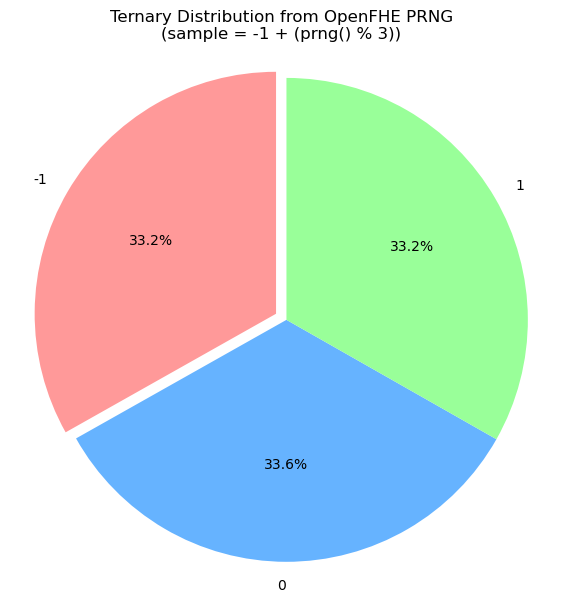

In [57]:
import matplotlib.pyplot as plt
from collections import Counter

# Read PRNG outputs from file
start_line = 5          # 1-based
end_line = 5 + 65535    # 65536 values total

with open("prng.txt", "r") as file:
    lines = file.readlines()

# Extract selected lines (convert to 0-based indexing)
selected_lines = lines[start_line - 1:end_line]

# Parse raw PRNG outputs (decimal strings) and apply ternary mapping
ternary_samples = []
for line in selected_lines:
    raw_str = line.strip()
    if not raw_str:
        continue
    try:
        x = int(raw_str)               # raw PRNG output (e.g., 856346601)
        ternary = -1 + (x % 3)         # map to {-1, 0, 1}
        ternary_samples.append(ternary)
    except ValueError:
        print(f"Skipping invalid line: {raw_str}")

# Count frequencies
freq = Counter(ternary_samples)
print("Ternary Frequencies:")
for val in sorted(freq):
    print(f"{val}: {freq[val]}")

# Ensure all values (-1, 0, 1) are present (even if count=0)
values = [-1, 0, 1]
counts = [freq.get(v, 0) for v in values]

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    counts,
    labels=[str(v) for v in values],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99'],
    explode=(0.05, 0, 0)  # slightly explode -1 slice for emphasis
)
plt.title("Ternary Distribution from OpenFHE PRNG\n(sample = -1 + (prng() % 3))")
plt.axis('equal')
plt.show()

In [54]:
0 + 0 + 1 + 0 + 1 + 0 + 0 + 1 + 0 + 1 + 0 + 0 + 0 + 1 + 1 + 0

6

In [55]:
-1-  1-  1-  0-  1-  1-  0-  0-  0-  0-  0-  1-  0-  1-  0-  0

-7

In [56]:
18 - 7 + 6

17